In [60]:
#Import or collect tweets using a keyword or hashtag. Watch your rate limiting
# After setting up a twitter account and applying for a developer account, my approval still has not come.
#This may be because I am not a twitter user and just opened the account and have not done anything with it other than the application?
#I can no longer wait for approval so I found a tweet based file in Kaggle that contains geographic data and will download it
# into the appropriate file and start from there.

import pandas as pd
df = pd.read_csv('tweets.csv')
print(df.dtypes)




id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


In [61]:
#Use Pandas to sort and analyze your tweets.
#Prepping the data to graph keyword and location.
df = df.loc[df['location'].notnull()]

print(df[['keyword','location']].head())

  keyword         location
2  ablaze    New York City
3  ablaze   Morgantown, WV
5  ablaze               OC
6  ablaze  London, England
7  ablaze           Bharat


In [62]:
#Use Pandas to sort and analyze your tweets.
#Also here I am just making sure that my data is lined up the way I need it to be.
locs = df['location'].value_counts()
print(locs)

EVERYWHERE                 3
United Kingdom             3
Melbourne, Victoria        3
Ottawa, Ontario, Canada    3
London                     3
                          ..
Texas, USA                 1
St Augustine, FL           1
RVA✈️FLA                   1
PA                         1
Tempe, AZ                  1
Name: location, Length: 197, dtype: int64


In [63]:
#Calculate user coordinates, where feasible, for the set of collected tweets.
#This took so long! I cannot believe it finally worked!
#I significantly reducaed the size of my file to make this happen.
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='twitter-analysis-client')
limited = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def find_location(row):
    place = row['location']
    location = limited(place)
    
    if location != None:
        return location.latitude, location.longitude
    else:
        return "Not Found", "Not Found"

df[['latitude','longitude']] = df.apply(find_location, axis="columns", result_type="expand")
df

,id,keyword,location,text,target,latitude,longitude
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,40.712728,-74.006015
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,39.629681,-79.955944
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0,48.353559,27.395434
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1,51.507322,-0.127647
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1,22.351115,78.667743
...,...,...,...,...,...,...,...
316,316,annihilation,"Baltimore, MD",Are you speaking about the atrocities and anni...,1,39.290882,-76.610759
317,317,annihilation,India,Yeah I was surprised too when I heard it first...,0,22.351115,78.667743
318,318,annihilation,"Mumbai, India","You don't understand systemic oppression, that...",0,19.07599,72.877393
319,319,annihilation,Island,"I dont get your bias flipping, short annihilat...",0,64.984182,-18.105901


In [64]:
#Map the tweets using the calculated locations.

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

KeyError: 0

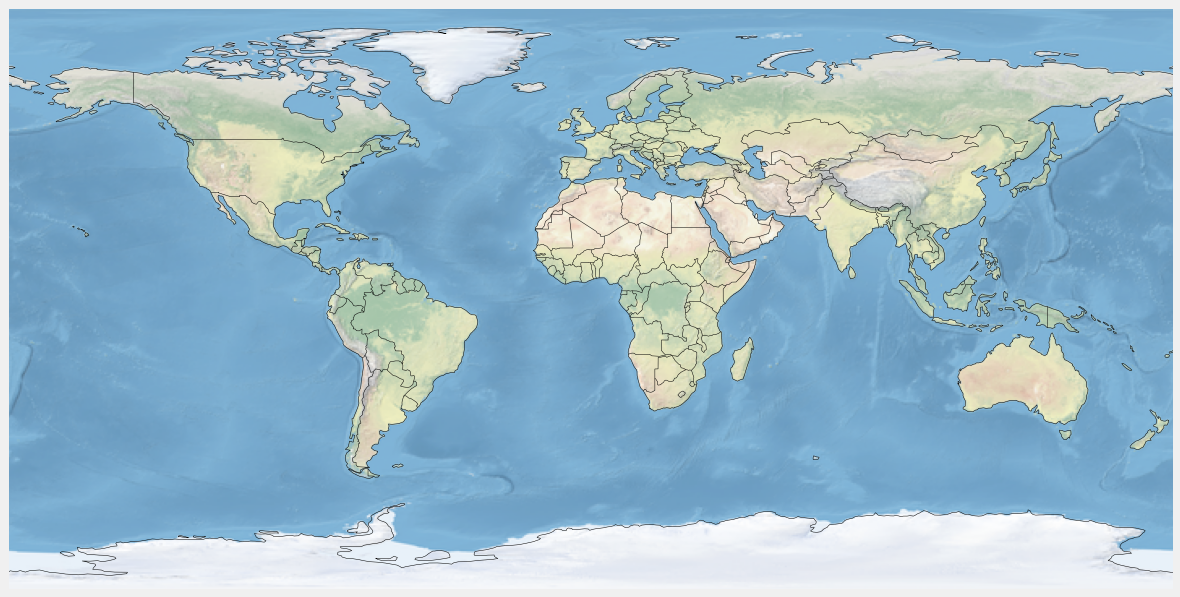

In [67]:
##Map the tweets using the calculated locations.
#I have tried and failed numerous different attempts to plot the data on the map I have created.
#I cannot track down the error from the model provided. I attempted to create a scatter plot layered over the map, but that also has failed.
# Through trial and error I know that my first 12 lines of code in this section are good. Well apparently, though I did not change the code it now
#has a problem with my lats and longs lines. Fixed it.
# I also found an additional import that allowed me to add some nice features to my blank map.

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Circle

lats = df['latitude'].dropna()
longs = df['longitude'].dropna()

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

#I understand that this is the crux of the functionality of this week's code, but I cannot get it to work. I want this for loop to pull all of
# the lats and longs from my dataframe and plot them on the coordinated map underneath. I also tried some scatter plot methods I found from google that
# were taking me further away from where I wanted to go.

for i in range(0, len(lats)):
    ax.plot(longs[i], lats[i], 'ro', transform=ccrs.PlateCarree())
                                                                                              
ax.coastlines(resolution='50m')
ax.set_global()

plt.show()



<AxesSubplot:xlabel='keyword'>

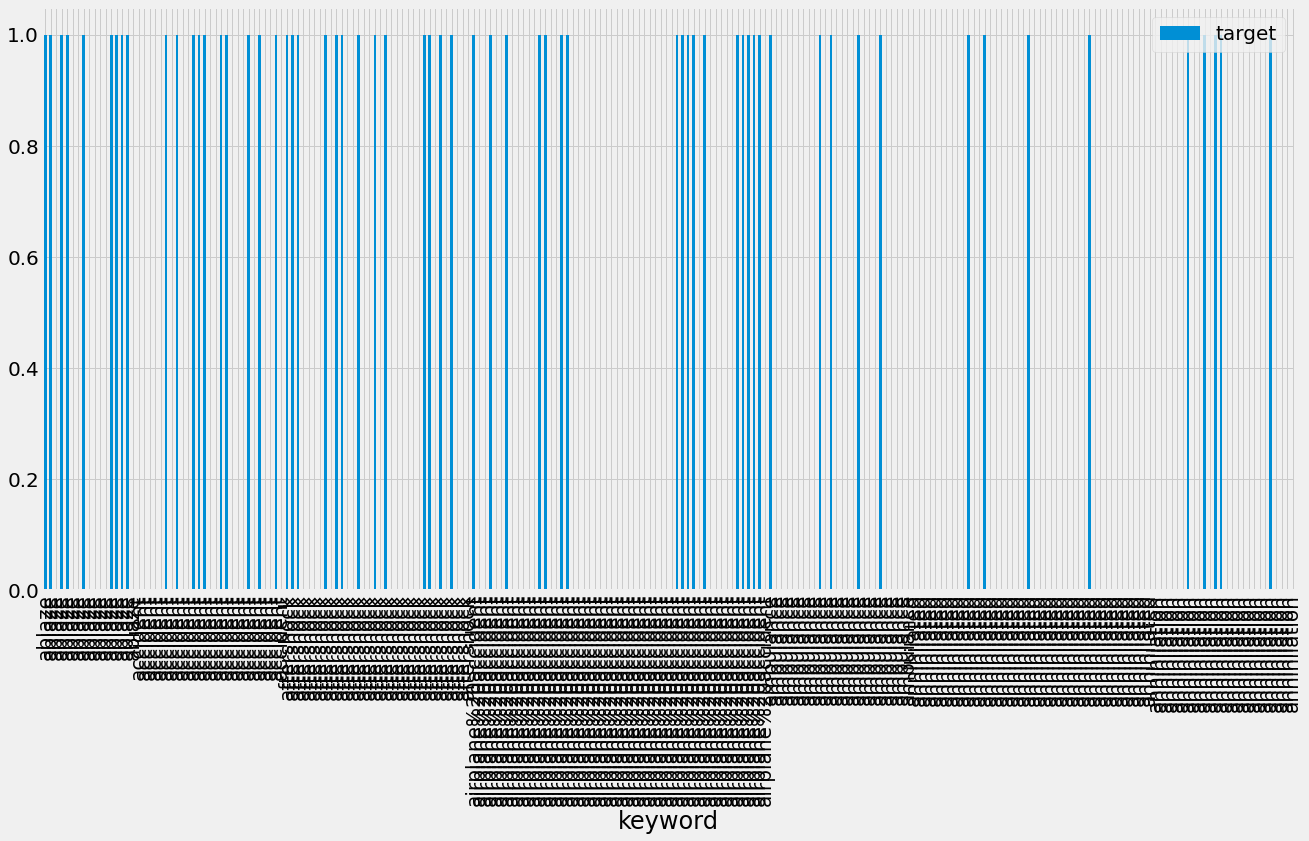

In [87]:
#Use at least one data visualization from a previous exercise, demo, or the course text to analyze a different element of your tweets.csv
#This is just the simpilest example of my failed graphs.

df.plot(kind='bar',x='keyword',y='target')


NameError: name 'ablaze_counts' is not defined

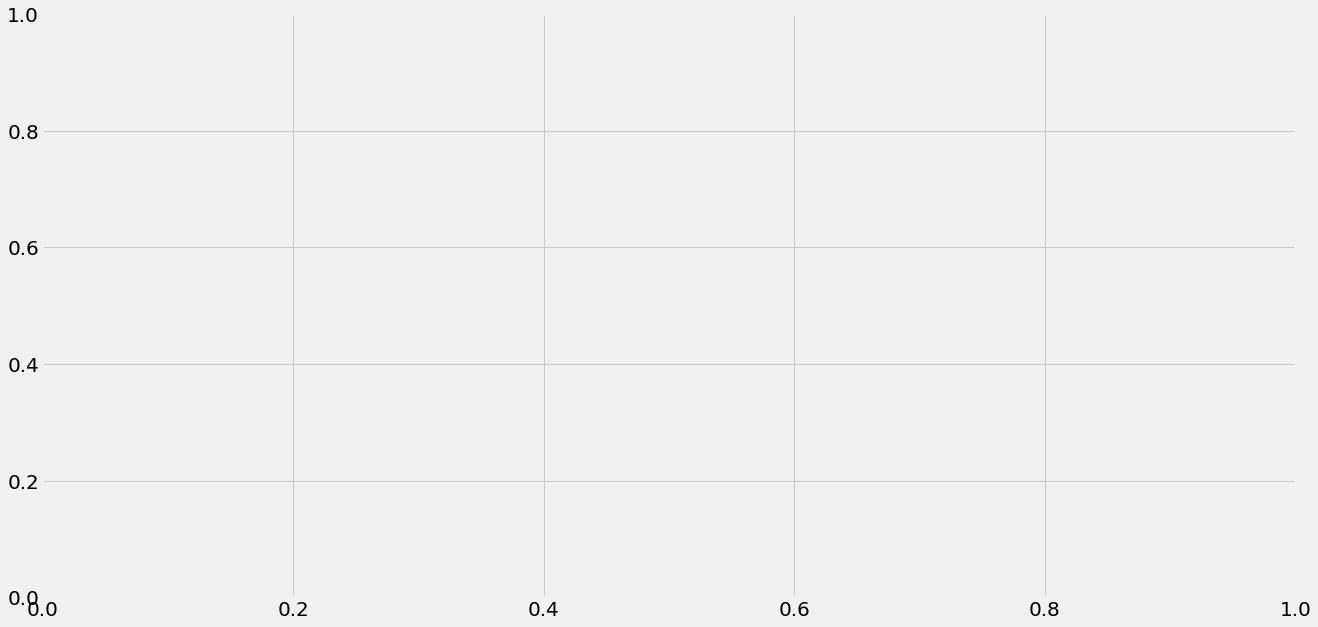

In [91]:
#I believe that my issue here is that I need to tolkenize this data before being able to count it, but I was not sure if that was the case when 
#the data is being pulled from a dataframe rather than a wordbag. Either way I am 12 hours into this and am burnt. I will try to correct these last
# two steps on Sunday if I can finish my other responsibilities early this week.
import numpy as np

x = np.arange(len('tweets.csv'))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ablaze_counts, width, label='Ablaze')
rects2 = ax.bar(x + width/2, accident_counts, width, label='Accident')

ax.set_ylabel('Word Count')
ax.set_title('Location')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()